### 05 - Importing Data in Python I
* **Intro to flat files**
    * Importing from working directory *(! ls, open(), close(), with open(), .readline())*
    * Importing with NumPy *(np.loadtxt(), np.recfromcsv())*
    * Importing with  pandas *(read_csv(), .values, DataFrame.hist())*
* **Importing data from other file types**
    * Pickled files (pickle.load())
    * Excel files (pd.ExcelFile, .sheet_names, .parse())
    * SAS/Stata files (file.to_data_frame(), pd.read_stata(),  
    * HDF5 files (h5py.File(), .keys())
    * MatLab files (scipy.io.loadmat(), .keys())
* **Working with relational DB**
    * Querying DB (create_engine(), .table_names(), .connect(), .execute(), SELECT, WHERE, ORDER BY, .fetchall(), .keys())
    * Exploiting table relationships (INNER JOIN .. ON)

## Intro to flat files

### Read files from directory

In [1]:
# Exploring your working directory

! ls

01 - Intro to Python.ipynb
02 - Intermediate Python.ipynb
03 - Python Data Science Toolbox I.ipynb
04 - Python Data Science Toolbox II.ipynb
05 - Importing Data in Python I.ipynb
Chinook.sqlite
Dogs.csv
EU_data.csv
RU_data.py
fin.csv
finland.csv
finland.h5
finland.pkl
finland.xlsx
finland_blanked.txt
images.csv
my_dogs.csv
mytestfile.hdf5
python.txt


In [2]:
# Importing entire text files
file = open('python.txt', 'r')
print(file.read())
print()

print('Is file closed? ' + str(file.closed))
file.close()
print('Is file closed? ' + str(file.closed))

Python is powerful... and fast; 
plays well with others; 
runs everywhere; 
is friendly & easy to learn; 
is Open.
These are some of the reasons people who use Python would rather not use anything else.

source: https://www.python.org/about/

Is file closed? False
Is file closed? True


In [3]:
# Importing text files line by line

with open('python.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())
    print(file.readline())
    print(file.readline())

Python is powerful... and fast; 

plays well with others; 

runs everywhere; 

is friendly & easy to learn; 

is Open.



### Flat files with NumPy

<class 'numpy.ndarray'>


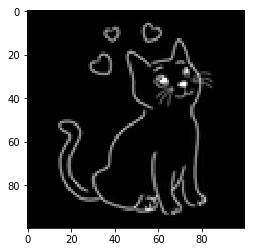

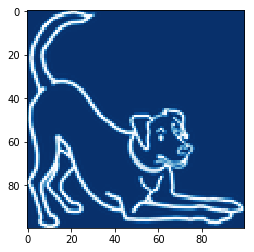

In [13]:
# Using NumPy to import flat files

import numpy as np
import matplotlib.pyplot as plt

images = np.loadtxt('images.csv', delimiter = ',')
print(type(images))

img_1 = images[0, :]
img_sq = np.reshape(img_1, (100, 100))

plt.imshow(img_sq, cmap='Greys', interpolation='nearest')
plt.show()

img_2 = images[1, :]
img_sq = np.reshape(img_2, (100, 100))

plt.imshow(img_sq, cmap='Blues', interpolation='nearest')
plt.show()

In [14]:
np.loadtxt('finland.csv', delimiter=',', dtype=str)

array([['City', 'Population', 'Land area', 'Density'],
       ['Helsinki', '642045', '213.75', '3003.72'],
       ['Espoo', '277375', '312.26', '888.28'],
       ['Tampere', '230537', '525.03', '439.09'],
       ['Vantaa', '221821', '238.37', '930.57'],
       ['Oulu', '201124', '1410.17', '142.62'],
       ['Turku', '188584', '245.67', '767.63'],
       ['Jyväskylä', '139260', '1170.99', '118.93'],
       ['Lahti', '119395', '135.05', '884.08'],
       ['Kuopio', '117842', '1597.39', '73.77'],
       ['Kouvola', '84548', '2558.24', '33.05'],
       ['Pori', '84779', '834.06', '101.65'],
       ['Joensuu', '75652', '2381.76', '31.76'],
       ['Lappeenranta', '72685', '1433.36', '50.71'],
       ['Hämeenlinna', '67601', '1785.76', '37.86'],
       ['Vaasa', '66876', '188.81', '354.2']], dtype='<U12')

In [15]:
# Customizing NumPy import

data = np.loadtxt('finland.csv', delimiter=',', skiprows=1, usecols=[1, 2])
print(data)

[[6.42045e+05 2.13750e+02]
 [2.77375e+05 3.12260e+02]
 [2.30537e+05 5.25030e+02]
 [2.21821e+05 2.38370e+02]
 [2.01124e+05 1.41017e+03]
 [1.88584e+05 2.45670e+02]
 [1.39260e+05 1.17099e+03]
 [1.19395e+05 1.35050e+02]
 [1.17842e+05 1.59739e+03]
 [8.45480e+04 2.55824e+03]
 [8.47790e+04 8.34060e+02]
 [7.56520e+04 2.38176e+03]
 [7.26850e+04 1.43336e+03]
 [6.76010e+04 1.78576e+03]
 [6.68760e+04 1.88810e+02]]


['City' 'Population' 'Land area' 'Density']
[201124.     1410.17]


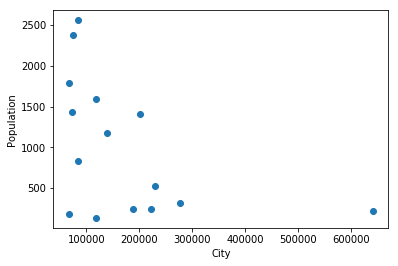

In [16]:
# Importing different datatypes

data = np.loadtxt('finland.csv', delimiter=',', dtype=str)
print(data[0])
data_float = np.loadtxt('finland.csv', delimiter=',', dtype=float, skiprows=1, usecols=[1,2])
print(data_float[4])

plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel(data[0][0])
plt.ylabel(data[0][1])
plt.show()

In [18]:
# Working with mixed datatypes

d = np.recfromcsv('finland.csv', delimiter=',', dtype=None)
print(d[[0, 2, 5]])

[(b'Helsinki', 642045, 213.75, 3003.72)
 (b'Tampere', 230537, 525.03,  439.09) (b'Turku', 188584, 245.67,  767.63)]


/anaconda3/lib/python3.6/site-packages/numpy/lib/npyio.py:2258: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


### Importing flat files using pandas

In [19]:
# Using pandas to import flat files as DataFrames

import pandas as pd
df = pd.read_csv('finland.csv', delimiter=',')
print(df.head(6))

       City  Population  Land area  Density
0  Helsinki      642045     213.75  3003.72
1     Espoo      277375     312.26   888.28
2   Tampere      230537     525.03   439.09
3    Vantaa      221821     238.37   930.57
4      Oulu      201124    1410.17   142.62
5     Turku      188584     245.67   767.63


In [20]:
# Using pandas to import flat files as DataFrames and get values

df = pd.read_csv('finland.csv', delimiter=',', nrows=4, header=None)
print(df.values)
print(type(df.values))

[['City' 'Population' 'Land area' 'Density']
 ['Helsinki' '642045' '213.75' '3003.72']
 ['Espoo' '277375' '312.26' '888.28']
 ['Tampere' '230537' '525.03' '439.09']]
<class 'numpy.ndarray'>


          Population  Land area  Density
City                                    
Helsinki         NaN     213.75  3003.72
Espoo       277375.0     312.26   888.28
Tampere     230537.0     525.03      NaN
Vantaa           NaN     238.37   930.57
Oulu        201124.0    1410.17   142.62


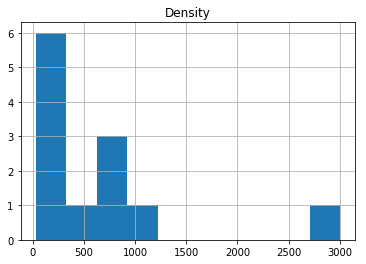

In [23]:
# Customizing your pandas import
df = pd.read_csv('finland_blanked.txt', delimiter=';', index_col=0, na_values='Nothing')
print(df.head())

pd.DataFrame.hist(df[['Density']])
plt.show()

## Importing data from other file types

### Pickle

In [24]:
# Loading a pickle file

import pickle
with open('finland.pkl', 'rb') as file:
    pkl = pickle.load(file)

print(pkl)
print(type(pkl))

{'City': ['Helsinki', 'Espoo', 'Tampere', 'Vantaa', 'Oulu', 'Turku', 'Jyväskylä', 'Lahti', 'Kuopio', 'Kouvola', 'Pori', 'Joensuu', 'Lappeenranta', 'Hämeenlinna', 'Vaasa'], 'Population': [642045, 277375, 230537, 221821, 201124, 188584, 139260, 119395, 117842, 84548, 84779, 75652, 72685, 67601, 66876], 'Land area': [213.75, 312.26, 525.03, 238.37, 1410.17, 245.67, 1170.99, 135.05, 1597.39, 2558.24, 834.06, 2381.76, 1433.36, 1785.76, 188.81], 'Density': [3003.72, 888.28, 439.09, 930.57, 142.62, 767.63, 118.93, 884.08, 73.77, 33.05, 101.65, 31.76, 50.71, 37.86, 354.2]}
<class 'dict'>


### Excel

In [25]:
# Loading Excel file

xl = pd.ExcelFile('finland.xlsx')
print(xl.sheet_names)
print(type(xl))
print()

df = xl.parse(xl.sheet_names[1])
print(df.head())
print()

df = xl.parse(1, usecols=[0, 1, 4], names=['Month', 'Temp(max)', 'Year'])
print(df.head())

['Regions  - finland', 'Max temperatures', 'Min temperatures']
<class 'pandas.io.excel.ExcelFile'>

      month Temperature,C Temperature,F       date  year  \
0   January       +10.9°C        51.6°F 1973-01-06  1973   
1  February       +11.8°C        53.2°F 1943-02-28  1943   
2     March       +17.5°C        63.5°F 2007-03-27  2007   
3     April       +25.5°C        77.9°F 1921-04-27  1921   
4       May       +31.0°C        87.8°F 1995-05-31  1995   

                            place          district  
0                       Mariehamn             Åland  
1                 Ilmala,Helsinki  Southern Finland  
2  Helsinki-Vantaa Airport,Vantaa  Southern Finland  
3                       Jyväskylä   Central Finland  
4                      Lapinjärvi  Southern Finland  

      Month Temp(max)  Year
0   January   +10.9°C  1973
1  February   +11.8°C  1943
2     March   +17.5°C  2007
3     April   +25.5°C  1921
4       May   +31.0°C  1995


### SAS/Stata

### HDF5

### MATLAB

## Working with relational databases in Python

### Querying relational databases in Python

In [26]:
# Creating a database engine and getting names of tables

from sqlalchemy import create_engine

engine = create_engine('sqlite:///Chinook.sqlite')
table_names = engine.table_names()
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


In [27]:
# Creating a simple query to database

import pandas as pd

con = engine.connect()
rs = con.execute("SELECT * from Genre")
df = pd.DataFrame(rs.fetchall())
con.close()

print(df)

     0                   1
0    1                Rock
1    2                Jazz
2    3               Metal
3    4  Alternative & Punk
4    5       Rock And Roll
5    6               Blues
6    7               Latin
7    8              Reggae
8    9                 Pop
9   10          Soundtrack
10  11          Bossa Nova
11  12      Easy Listening
12  13         Heavy Metal
13  14            R&B/Soul
14  15   Electronica/Dance
15  16               World
16  17         Hip Hop/Rap
17  18     Science Fiction
18  19            TV Shows
19  20    Sci Fi & Fantasy
20  21               Drama
21  22              Comedy
22  23         Alternative
23  24           Classical
24  25               Opera


In [28]:
# Select all tracks from the Track table with duration in ms

with engine.connect() as con:
    rs = con.execute("SELECT Name, Milliseconds from Track")
    tracks = pd.DataFrame(rs.fetchall())
    tracks.columns = rs.keys()
print(tracks.shape)  
print(tracks.head())

(3503, 2)
                                      Name  Milliseconds
0  For Those About To Rock (We Salute You)        343719
1                        Balls to the Wall        342562
2                          Fast As a Shark        230619
3                        Restless and Wild        252051
4                     Princess of the Dawn        375418


In [29]:
# Select all tracks from the Track table where the GenreId is equal to Comedy (22) 

with engine.connect() as con:
    rs = con.execute("SELECT * from Track WHERE GenreId == 22")
    comedies = pd.DataFrame(rs.fetchall())
    comedies.columns = rs.keys()
print(comedies.shape)  
print(comedies.head())

(17, 9)
   TrackId                              Name  AlbumId  MediaTypeId  GenreId  \
0     3208                       The Convict      251            3       22   
1     3209  A Benihana Christmas, Pts. 1 & 2      251            3       22   
2     3210                Back from Vacation      251            3       22   
3     3211                Traveling Salesmen      251            3       22   
4     3212        Producer's Cut: The Return      251            3       22   

  Composer  Milliseconds      Bytes  UnitPrice  
0     None       1273064  248863427       1.99  
1     None       2519436  515301752       1.99  
2     None       1271688  245378749       1.99  
3     None       1289039  250822697       1.99  
4     None       1700241  337219980       1.99  


In [30]:
# Select all soundtracks from the Track table ordered by duration (ms)

with engine.connect() as con:
    rs = con.execute("SELECT TrackId, Name, Milliseconds from Track WHERE GenreId == 10 ORDER BY Milliseconds")
    ost = pd.DataFrame(rs.fetchall())
    ost.columns = rs.keys()
print(ost.shape)  
print(ost.tail())

(43, 3)
    TrackId                Name  Milliseconds
38      373      Sao Lucas 2001        296254
39     2127      Your Blue Room        328228
40     2125      United Colours        330266
41     2131       Miss Sarajevo        340767
42     2128  Always Forever Now        383764


In [31]:
# Direct querying with pandas

engine = create_engine('sqlite:///Chinook.sqlite')
customers = pd.read_sql_query("SELECT * from Customer", engine)
print(customers.head())

   CustomerId  FirstName     LastName  \
0           1       Luís    Gonçalves   
1           2     Leonie       Köhler   
2           3   François     Tremblay   
3           4      Bjørn       Hansen   
4           5  František  Wichterlová   

                                            Company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                              None   
2                                              None   
3                                              None   
4                                  JetBrains s.r.o.   

                           Address                 City State         Country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP          Brazil   
1          Theodor-Heuss-Straße 34            Stuttgart  None         Germany   
2                1498 rue Bélanger             Montréal    QC          Canada   
3                 Ullevålsveien 14                 Oslo  None          Norway   
4                

In [32]:
# More complex querying directly with pandas

engine = create_engine('sqlite:///Chinook.sqlite')
customers = pd.read_sql_query(
    "SELECT FirstName, LastName, City from Customer WHERE Country == 'Canada' ORDER BY CustomerId", engine)
print(customers)

  FirstName  LastName         City
0  François  Tremblay     Montréal
1      Mark   Philips     Edmonton
2  Jennifer  Peterson    Vancouver
3    Robert     Brown      Toronto
4    Edward   Francis       Ottawa
5    Martha      Silk      Halifax
6     Aaron  Mitchell     Winnipeg
7     Ellie  Sullivan  Yellowknife


### Exploiting table relationships

In [33]:
# Getting data from different tables

with engine.connect() as con:
    rs = con.execute("SELECT Email, InvoiceDate, Total from Customer INNER JOIN Invoice ON Customer.CustomerId = Invoice.CustomerId")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()
    
print(df.head())

                    Email          InvoiceDate  Total
0   leonekohler@surfeu.de  2007-01-01 00:00:00   1.98
1   bjorn.hansen@yahoo.no  2007-01-02 00:00:00   3.96
2   daan_peeters@apple.be  2007-01-03 00:00:00   5.94
3      mphilips12@shaw.ca  2007-01-06 00:00:00   8.91
4  johngordon22@yahoo.com  2007-01-11 00:00:00  13.86


In [34]:
# Filtering INNER JOIN
sel = "SELECT Email, InvoiceDate, Total from Customer INNER JOIN Invoice ON Customer.CustomerId = Invoice.CustomerId WHERE InvoiceDate >= '2011-11-01'"
with engine.connect() as con:
    rs = con.execute(sel)
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()
    
print(df.head())

                       Email          InvoiceDate  Total
0      wyatt.girard@yahoo.fr  2011-11-03 00:00:00   1.98
1  terhi.hamalainen@apple.fi  2011-11-03 00:00:00   1.98
2       hughoreilly@apple.ie  2011-11-04 00:00:00   3.96
3     enrique_munoz@yahoo.es  2011-11-05 00:00:00   5.94
4   diego.gutierrez@yahoo.ar  2011-11-08 00:00:00   8.91
